In [1]:
!pip install nlp

In [2]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import nlp

In [3]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [4]:
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


In [5]:
print("Using TensorFlow version : ",tf.__version__)

Using TensorFlow version :  2.5.0


In [6]:
dataset=nlp.load_dataset('emotion')

Using custom data configuration default


In [7]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [8]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']

In [9]:
train

Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000)

In [10]:
def get_tweets(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets,labels

In [11]:
tweets,labels=get_tweets(train)

In [12]:
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [14]:
tokenizer=Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [15]:
tokenizer.texts_to_sequences([tweets[1]])

[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

In [16]:
tweets[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [17]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

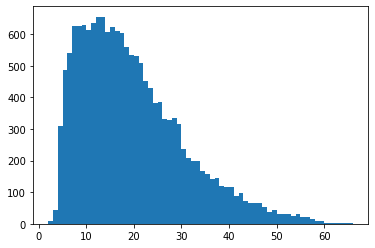

In [18]:
length=[len(t.split(' ')) for t in tweets]
plt.hist(length,bins=len(set(length)))
plt.show()

In [19]:
max_length=50


In [20]:
def get_sequences(tokenizer,tweets):
  sequences=tokenizer.texts_to_sequences(tweets)
  padded_sequence=pad_sequences(sequences,padding='post',truncating='post',maxlen=max_length)
  return padded_sequence

In [21]:
padded_train_sequence=get_sequences(tokenizer,tweets)

In [22]:
padded_train_sequence[1]

array([   2,   40,  101,   60,    8,   15,  494,    5,   15, 3496,  553,
         32,   60,   61,  128,  148,   76, 1480,    4,   22, 1255,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [23]:
classes=set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

<function matplotlib.pyplot.show>

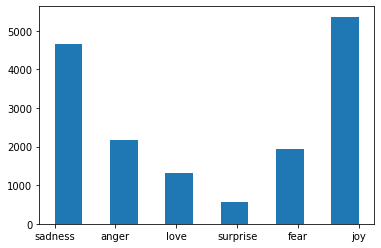

In [24]:
plt.hist(labels, bins=11)
plt.show

In [25]:
class_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in class_to_index.items())

In [26]:
class_to_index

{'anger': 3, 'fear': 5, 'joy': 4, 'love': 1, 'sadness': 0, 'surprise': 2}

In [27]:
index_to_class

{0: 'sadness', 1: 'love', 2: 'surprise', 3: 'anger', 4: 'joy', 5: 'fear'}

In [28]:
name_to_ids= lambda labels:np.array([class_to_index.get(x) for x in labels])

In [29]:
  train_labels=name_to_ids(labels)

In [30]:
train_labels[1]

0

In [31]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Embedding(10000,16,input_length=max_length),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                                  tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 6)                 246       
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [33]:
val_tweets,val_labels=get_tweets(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=name_to_ids(val_labels)

In [34]:
val_tweets[1],val_labels[1]

('i feel like i am still looking at a blank canvas blank pieces of paper', 0)

In [35]:
history=model.fit(padded_train_sequence,train_labels,verbose=1,epochs=20,validation_data=(val_seq,val_labels),
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)])

Epoch 1/20
500/500 [==============================] - 28s 46ms/step - loss: 1.3122 - accuracy: 0.4956 - val_loss: 0.9130 - val_accuracy: 0.6655
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: 0.6981 - accuracy: 0.7528 - val_loss: 0.6393 - val_accuracy: 0.7990
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.4132 - accuracy: 0.8603 - val_loss: 0.5015 - val_accuracy: 0.8365
Epoch 4/20
500/500 [==============================] - 22s 43ms/step - loss: 0.2544 - accuracy: 0.9194 - val_loss: 0.4185 - val_accuracy: 0.8690
Epoch 5/20
500/500 [==============================] - 21s 43ms/step - loss: 0.1661 - accuracy: 0.9496 - val_loss: 0.4756 - val_accuracy: 0.8605
Epoch 6/20
500/500 [==============================] - 23s 46ms/step - loss: 0.1262 - accuracy: 0.9615 - val_loss: 0.4272 - val_accuracy: 0.8815
Epoch 7/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0938 - accuracy: 0.9722 - val_loss: 0.4418 - val_accuracy:

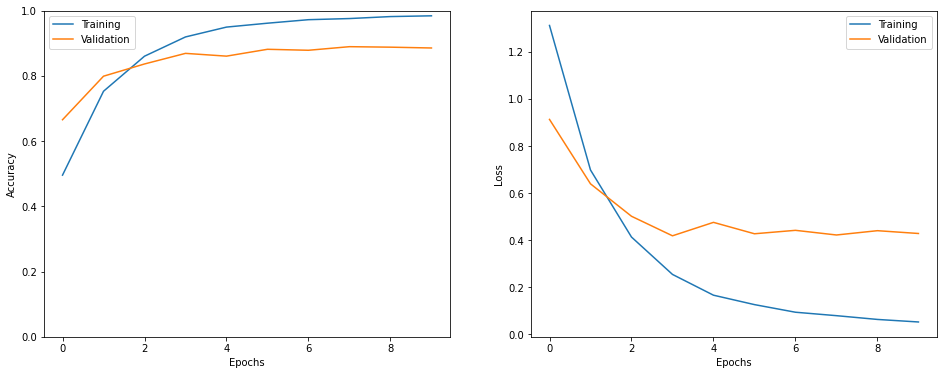

In [36]:
show_history(history)

In [37]:
test_tweets,test_labels=get_tweets(test)
test_seq=get_sequences(tokenizer,test_tweets)
test_labels=name_to_ids(test_labels)

In [38]:
model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 12ms/step - loss: 0.3900 - accuracy: 0.8845


[0.39000698924064636, 0.8845000267028809]

In [39]:
i=random.randint(0,len(test_labels)-1)
print('Sentence : ', test_tweets[i])
print('Label : ', index_to_class[test_labels[i]])

p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class=index_to_class[np.argmax(p).astype('uint8')]
print('Predicted emotion : ',pred_class)

Sentence :  i first started reading city of dark magic i thought it would be a challenge to actually enjoy it since i felt like the content about famous classical music was over my head but luckily after plowing through the first chapter i became more confident and started feeling less dumb
Label :  sadness
Predicted emotion :  joy


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


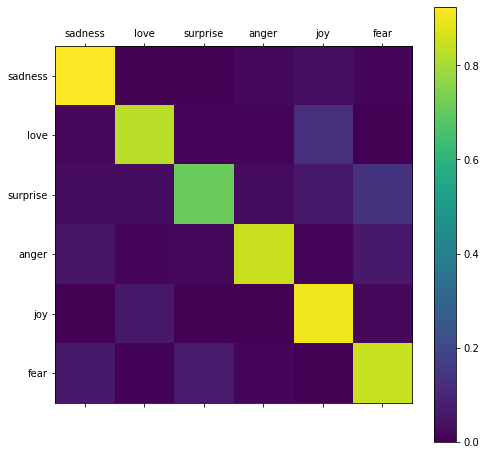

In [40]:
preds=model.predict_classes(test_seq)
show_confusion_matrix(test_labels,preds,list(classes))